In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import os

pd.set_option('display.max_columns', None)

### Let's look at the overall dataset to think about risk factors distributions



In [8]:
nhanes = pd.read_stata("fullyImputedDataset.dta")
nhanes.head()

,index,WTINT2YR,a1c,age,bmi,diedBy2011,gender,hdl,ldl,timeInUS,tot_chol,trig,weight,year,meanSBP,meanDBP,raceEthnicity,smokingStatus
0,0,102641.406474,5.1,22.0,23.3,0,1.0,41.0,110.0,NaN,168.0,0.948,69.2,2011,110.666667,74.666667,3,0
1,1,127351.373299,4.9,44.0,23.2,0,2.0,28.0,151.0,NaN,190.0,0.632,67.2,2011,118.000000,60.000000,3,0
2,2,14391.778470,5.4,21.0,20.1,0,1.0,43.0,73.0,NaN,132.0,0.881,54.6,2011,124.666667,78.000000,5,0
3,3,26960.774346,5.6,43.0,33.3,0,2.0,73.0,68.0,NaN,169.0,1.592,98.6,2011,102.000000,71.333333,4,2
4,4,24912.668432,5.0,80.0,33.9,0,1.0,54.0,132.0,NaN,203.0,1.084,95.8,2011,98.000000,38.000000,3,0


## Problem 1: Variables are  non-normally distributted 
Not terrible for BP and HDL, but pretty awful for a1c



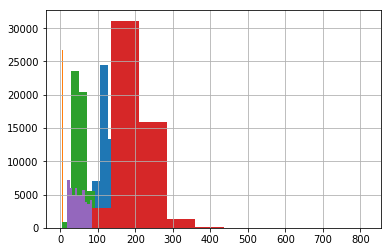

In [9]:
nhanes.meanSBP.hist()

nhanes.a1c.hist()

nhanes.hdl.hist()

nhanes.tot_chol.hist()

nhanes.age.hist()

## Problem 2 — Risk factors are correlated



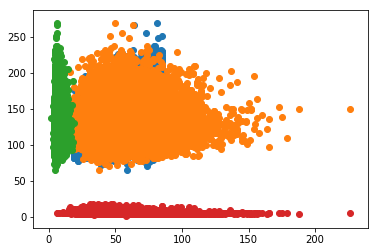

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline  

plt.scatter(nhanes.age, nhanes.meanSBP)

plt.scatter(nhanes.hdl, nhanes.meanSBP)

plt.scatter(nhanes.a1c, nhanes.meanSBP)

plt.scatter(nhanes.hdl, nhanes.a1c)



## So...does it matter?

So, there are two key questions, i think:
1. Does our data reproduce NHANES — if we have enough outliers that are problematic enough, then with repeated sampling we might end up with samples that are pretty far off from the main sample by luck...



In [11]:

largeSample = nhanes.sample(1000000, replace=True).dropna()

print(largeSample.age.describe())
print(nhanes.dropna().age.describe())

print(largeSample.meanSBP.describe())
print(nhanes.dropna().meanSBP.describe())

print(largeSample.a1c.describe())
print(nhanes.dropna().a1c.describe())

print( np.corrcoef (largeSample.age, largeSample.meanSBP))
print (np.corrcoef(nhanes.dropna().age, nhanes.dropna().meanSBP))

print( np.corrcoef (largeSample.meanSBP, largeSample.a1c))
print (np.corrcoef(nhanes.dropna().meanSBP, nhanes.dropna().a1c))

print( np.corrcoef (largeSample.hdl, largeSample.a1c))
print (np.corrcoef(nhanes.dropna().hdl, nhanes.dropna().a1c))


count    263112.000000
mean         46.912136
std          17.390264
min          19.000000
25%          33.000000
50%          45.000000
75%          61.000000
max          85.000000
Name: age, dtype: float64
count    13504.00000
mean        46.86878
std         17.36586
min         19.00000
25%         33.00000
50%         45.00000
75%         61.00000
max         85.00000
Name: age, dtype: float64
count    263112.000000
mean        122.917355
std          19.186178
min          76.666667
25%         110.000000
50%         119.333333
75%         132.000000
max         252.000000
Name: meanSBP, dtype: float64
count    13504.000000
mean       122.872334
std         19.177544
min         76.666667
25%        110.000000
50%        119.333333
75%        132.000000
max        252.000000
Name: meanSBP, dtype: float64
count    263112.00000
mean          5.76143
std           1.15219
min           3.50000
25%           5.20000
50%           5.50000
75%           5.80000
max          17.50000



It Looks like this this isn't going to be a huge problem — a large sample pretty nicely reproduces the mean, variation adn the the correlations in teh underlyign data structure reasonably well. This isn't a guarantee that everythign will work well, but I think it means that we can get away with a relatively simple approach.

For a single year, just sample with replacement from NHANES, while applying weights.

For mulitple years, it'll be a little trickier — but, we can probably combine mulitple years of data, and then 


